In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
def get_image(path, img_transform, size = (300,300)):
    image = Image.open(path)
    image = image.resize(size, Image.LANCZOS)
    image = img_transform(image).unsqueeze(0)
    return image.to(device)

def get_gram(m):
    '''
    m is of shape(1,C,H,W)
    '''
    _, c, h, w = m.size()
    m = m.view(c, h * w)
    m = torch.mm(m, m.t())
    return m

def denormalize_img(inp):
    inp = inp.numpy().transpose((1, 2, 0)) # C,H,W --> (H,W,C)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

### Comprehensive Code Explanation

#### Function: `get_image`

```python
def get_image(path, img_transform, size=(300, 300)):
    image = Image.open(path)
    image = image.resize(size, Image.LANCZOS)
    image = img_transform(image).unsqueeze(0)
    return image.to(device)
```

1. **Line-by-line Breakdown:**
   - `def get_image(path, img_transform, size=(300, 300)):`: 定义一个名为 `get_image` 的函数，接受三个参数：`path`（图像路径），`img_transform`（图像变换函数），`size`（图像调整大小，默认为300x300）。
   - `image = Image.open(path)`: 使用PIL库打开指定路径的图像文件。
   - `image = image.resize(size, Image.LANCZOS)`: 将图像调整为指定大小，使用LANCZOS滤波器进行高质量的缩放。
   - `image = img_transform(image).unsqueeze(0)`: 对图像应用变换函数，并增加一个维度（通常用于批处理）。
   - `return image.to(device)`: 将图像移动到指定设备（如GPU）并返回。

2. **Purpose and Functionality:**
   - 该函数用于加载、调整大小并转换图像，以便在深度学习模型中使用。

3. **Technical Reasoning:**
   - 使用LANCZOS滤波器进行高质量缩放。
   - 增加维度以适应批处理需求。
   - 将图像移动到指定设备以加速计算。

#### Function: `get_gram`

```python
def get_gram(m):
    _, c, h, w = m.size()
    m = m.view(c, h * w)
    m = torch.mm(m, m.t())
    return m
```

1. **Line-by-line Breakdown:**
   - `def get_gram(m):`: 定义一个名为 `get_gram` 的函数，接受一个参数 `m`（特征图）。
   - `_, c, h, w = m.size()`: 获取特征图的尺寸（批次大小、通道数、高度、宽度）。
   - `m = m.view(c, h * w)`: 将特征图重塑为二维张量，形状为（通道数，高度*宽度）。
   - `m = torch.mm(m, m.t())`: 计算特征图的Gram矩阵。
   - `return m`: 返回Gram矩阵。

2. **Purpose and Functionality:**
   - 该函数用于计算特征图的Gram矩阵，常用于风格迁移任务中。

3. **Technical Reasoning:**
   - Gram矩阵用于捕捉特征图中的风格信息。

#### Function: `denormalize_img`

```python
def denormalize_img(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp
```

1. **Line-by-line Breakdown:**
   - `def denormalize_img(inp):`: 定义一个名为 `denormalize_img` 的函数，接受一个参数 `inp`（归一化图像）。
   - `inp = inp.numpy().transpose((1, 2, 0))`: 将张量转换为NumPy数组并调整维度顺序。
   - `mean = np.array([0.485, 0.456, 0.406])`: 定义均值数组。
   - `std = np.array([0.229, 0.224, 0.225])`: 定义标准差数组。
   - `inp = std * inp + mean`: 反归一化图像。
   - `inp = np.clip(inp, 0, 1)`: 将图像像素值限制在0到1之间。
   - `return inp`: 返回反归一化后的图像。

2. **Purpose and Functionality:**
   - 该函数用于将归一化图像转换回原始图像，以便进行可视化。

3. **Technical Reasoning:**
   - 反归一化步骤使得图像可以在标准显示设备上正确显示。

### Multilevel Function and Parameter Analysis

#### Function: `get_image`

**A. Detailed Parameter Explanation:**
- `path`: 图像文件路径，字符串类型，必须是有效的文件路径。
- `img_transform`: 图像变换函数，通常是由`torchvision.transforms`定义的变换序列。
- `size`: 图像调整大小，元组类型，包含两个整数，表示宽度和高度。

**B. Function Context Analysis:**
- 选择该函数是为了简化图像预处理步骤。
- 可替代实现：直接在数据加载器中进行图像变换。
- 性能和设计考虑：使用LANCZOS滤波器进行高质量缩放。

#### Function: `get_gram`

**A. Detailed Parameter Explanation:**
- `m`: 特征图，PyTorch张量，形状为（批次大小，通道数，高度，宽度）。

**B. Function Context Analysis:**
- 选择该函数是为了计算特征图的Gram矩阵，用于风格迁移。
- 可替代实现：使用其他矩阵操作库。
- 性能和设计考虑：使用矩阵乘法计算Gram矩阵。

#### Function: `denormalize_img`

**A. Detailed Parameter Explanation:**
- `inp`: 归一化图像，PyTorch张量，形状为（通道数，高度，宽度）。

**B. Function Context Analysis:**
- 选择该函数是为了将归一化图像转换回原始图像。
- 可替代实现：在图像显示时进行反归一化。
- 性能和设计考虑：使用NumPy进行高效数组操作。

### Specialized Analysis Areas

#### Function Choice Insights

- `get_image`函数选择了LANCZOS滤波器进行高质量缩放，这是为了在图像预处理中保持图像质量。
- `get_gram`函数使用矩阵乘法计算Gram矩阵，这是为了高效捕捉特征图中的风格信息。
- `denormalize_img`函数使用NumPy进行反归一化，这是为了高效处理数组操作。

#### Activation Functions

- 本代码未涉及激活函数，但在深度学习模型中，激活函数的选择对模型性能有重要影响。

#### Data Processing Functions

- `get_image`和`denormalize_img`函数涉及图像处理，前者用于预处理，后者用于反归一化。

### Code Review Dimensions

- **Syntax Correctness:** 代码语法正确，无明显错误。
- **Performance Optimization Opportunities:** 可以考虑在数据加载器中进行图像变换以提高效率。
- **Coding Best Practices Adherence:** 代码结构清晰，函数命名合理。
- **Algorithmic Improvement Potential:** 可以进一步优化图像处理步骤以提高性能。

### Parameter-Specific Guidance

- **Common Configuration Mistakes:** 确保图像路径有效，变换函数正确定义。
- **Parameter Tuning Strategies:** 根据具体任务调整图像大小和变换函数。
- **Input Validation Recommendations:** 添加输入验证以确保图像路径和变换函数有效。

### Constructive Technical Feedback

- **Improvement Suggestions:**
  - 在`get_image`函数中添加输入验证。
  - 在`denormalize_img`函数中添加对输入类型的检查。
  
- **Rationale for Recommended Modifications:**
  - 输入验证可以提高代码的鲁棒性，防止无效输入导致错误。
  
- **Concrete Implementation Examples:**

```python
def get_image(path, img_transform, size=(300, 300)):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image path {path} does not exist.")
    image = Image.open(path)
    image = image.resize(size, Image.LANCZOS)
    image = img_transform(image).unsqueeze(0)
    return image.to(device)

def denormalize_img(inp):
    if not isinstance(inp, torch.Tensor):
        raise TypeError("Input must be a PyTorch tensor.")
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp
```

通过这些改进，可以提高代码的鲁棒性和可维护性。

![figure](https://user-images.githubusercontent.com/30661597/107026142-96fa0100-67aa-11eb-9f71-4adce01dd362.png)

In [3]:
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.selected_layers = [3, 8, 15, 22]
        self.vgg = models.vgg16(pretrained=True).features

    def forward(self, x):
        layer_features = []
        for layer_number, layer in self.vgg._modules.items():
            x = layer(x)
            if int(layer_number) in self.selected_layers:
                layer_features.append(x)
        return layer_features

### Comprehensive Code Explanation

#### Class: `FeatureExtractor`

```python
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.selected_layers = [3, 8, 15, 22]
        self.vgg = models.vgg16(pretrained=True).features

    def forward(self, x):
        layer_features = []
        for layer_number, layer in self.vgg._modules.items():
            x = layer(x)
            if int(layer_number) in self.selected_layers:
                layer_features.append(x)
        return layer_features
```

1. **Line-by-line Breakdown:**
   - `class FeatureExtractor(nn.Module):`: 定义一个名为 `FeatureExtractor` 的类，继承自 `nn.Module`。
   - `def __init__(self):`: 定义类的初始化方法。
   - `super(FeatureExtractor, self).__init__()`: 调用父类的初始化方法。
   - `self.selected_layers = [3, 8, 15, 22]`: 定义一个列表，包含需要提取特征的层的索引。
   - `self.vgg = models.vgg16(pretrained=True).features`: 加载预训练的VGG16模型，并获取其特征提取部分。
   - `def forward(self, x):`: 定义前向传播方法。
   - `layer_features = []`: 初始化一个空列表，用于存储选定层的特征。
   - `for layer_number, layer in self.vgg._modules.items():`: 遍历VGG16模型的每一层。
   - `x = layer(x)`: 将输入数据通过当前层。
   - `if int(layer_number) in self.selected_layers:`: 检查当前层是否在选定层列表中。
   - `layer_features.append(x)`: 如果是，将该层的输出添加到特征列表中。
   - `return layer_features`: 返回选定层的特征列表。

2. **Purpose and Functionality:**
   - 该类用于从预训练的VGG16模型中提取特定层的特征，常用于风格迁移和特征可视化任务中。

3. **Technical Reasoning:**
   - 通过选择特定层，可以提取不同层次的特征信息。
   - 使用预训练模型可以利用其在大规模数据集上的学习能力，提高特征提取的效果。

### Multilevel Function and Parameter Analysis

#### Method: `__init__`

**A. Detailed Parameter Explanation:**
- 无显式参数，使用类的实例化参数。

**B. Function Context Analysis:**
- 初始化方法用于设置类的基本属性和加载预训练模型。
- 选择VGG16模型是因为其在图像分类任务中的优异表现和广泛使用。
- 可替代实现：使用其他预训练模型如ResNet或Inception。
- 性能和设计考虑：VGG16模型结构简单，易于提取中间层特征。

#### Method: `forward`

**A. Detailed Parameter Explanation:**
- `x`: 输入数据，PyTorch张量，形状为（批次大小，通道数，高度，宽度）。

**B. Function Context Analysis:**
- 前向传播方法用于计算输入数据通过模型后的输出特征。
- 选择特定层的特征是为了捕捉不同层次的特征信息。
- 可替代实现：提取所有层的特征或选择不同的层。
- 性能和设计考虑：通过选择特定层，可以减少计算量和内存占用。

### Specialized Analysis Areas

#### Function Choice Insights

- 选择VGG16模型是因为其在图像分类任务中的优异表现和广泛使用。
- 选择特定层的特征是为了捕捉不同层次的特征信息。
- 可替代实现：使用其他预训练模型如ResNet或Inception。

#### Activation Functions

- 本代码未涉及激活函数，但在深度学习模型中，激活函数的选择对模型性能有重要影响。

#### Data Processing Functions

- `forward`方法涉及数据处理，将输入数据通过模型的每一层，并提取特定层的特征。

### Code Review Dimensions

- **Syntax Correctness:** 代码语法正确，无明显错误。
- **Performance Optimization Opportunities:** 可以考虑使用更高效的模型或减少选定层的数量以提高性能。
- **Coding Best Practices Adherence:** 代码结构清晰，函数命名合理。
- **Algorithmic Improvement Potential:** 可以进一步优化特征提取步骤以提高性能。

### Parameter-Specific Guidance

- **Common Configuration Mistakes:** 确保输入数据的形状和类型正确。
- **Parameter Tuning Strategies:** 根据具体任务调整选定层的索引。
- **Input Validation Recommendations:** 添加输入验证以确保输入数据的形状和类型正确。

### Constructive Technical Feedback

- **Improvement Suggestions:**
  - 在`__init__`方法中添加对预训练模型下载的检查。
  - 在`forward`方法中添加对输入数据形状的检查。
  
- **Rationale for Recommended Modifications:**
  - 输入验证可以提高代码的鲁棒性，防止无效输入导致错误。
  
- **Concrete Implementation Examples:**

```python
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.selected_layers = [3, 8, 15, 22]
        try:
            self.vgg = models.vgg16(pretrained=True).features
        except Exception as e:
            raise RuntimeError("Failed to load pretrained VGG16 model: " + str(e))

    def forward(self, x):
        if not isinstance(x, torch.Tensor):
            raise TypeError("Input must be a PyTorch tensor.")
        if x.dim() != 4:
            raise ValueError("Input tensor must have 4 dimensions (batch_size, channels, height, width).")
        
        layer_features = []
        for layer_number, layer in self.vgg._modules.items():
            x = layer(x)
            if int(layer_number) in self.selected_layers:
                layer_features.append(x)
        return layer_features
```

通过这些改进，可以提高代码的鲁棒性和可维护性。

In [4]:
img_transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

content_img = get_image('content.jpg', img_transform)
style_img = get_image('style.jpg', img_transform)
generated_img = content_img.clone()    # or nn.Parameter(torch.FloatTensor(content_img.size()))
generated_img.requires_grad = True

optimizer = torch.optim.Adam([generated_img], lr=0.003, betas=[0.5, 0.999])
encoder = FeatureExtractor().to(device)

for p in encoder.parameters():
    p.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 98.1MB/s]


### Comprehensive Code Explanation

#### Code Block

```python
img_transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

content_img = get_image('content.jpg', img_transform)
style_img = get_image('style.jpg', img_transform)
generated_img = content_img.clone()    # or nn.Parameter(torch.FloatTensor(content_img.size()))
generated_img.requires_grad = True

optimizer = torch.optim.Adam([generated_img], lr=0.003, betas=[0.5, 0.999])
encoder = FeatureExtractor().to(device)

for p in encoder.parameters():
    p.requires_grad = False
```

1. **Line-by-line Breakdown:**
   - `img_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])`: 定义图像变换，包括将图像转换为张量并进行归一化。
   - `content_img = get_image('content.jpg', img_transform)`: 加载内容图像并进行预处理。
   - `style_img = get_image('style.jpg', img_transform)`: 加载风格图像并进行预处理。
   - `generated_img = content_img.clone()`: 克隆内容图像作为生成图像的初始值。
   - `generated_img.requires_grad = True`: 设置生成图像的梯度计算。
   - `optimizer = torch.optim.Adam([generated_img], lr=0.003, betas=[0.5, 0.999])`: 定义Adam优化器，用于优化生成图像。
   - `encoder = FeatureExtractor().to(device)`: 实例化特征提取器并将其移动到指定设备。
   - `for p in encoder.parameters(): p.requires_grad = False`: 冻结特征提取器的参数，不进行梯度更新。

2. **Purpose and Functionality:**
   - 该代码块用于加载和预处理图像，初始化生成图像，定义优化器和特征提取器，并冻结特征提取器的参数。

3. **Technical Reasoning:**
   - 使用图像变换进行预处理，以适应预训练模型的输入要求。
   - 克隆内容图像作为生成图像的初始值，以便在风格迁移过程中进行优化。
   - 使用Adam优化器进行高效的梯度更新。
   - 冻结特征提取器的参数，以确保其在风格迁移过程中保持不变。

### Multilevel Function and Parameter Analysis

#### Function: `transforms.Compose`

**A. Detailed Parameter Explanation:**
- `transforms.ToTensor()`: 将PIL图像或NumPy数组转换为PyTorch张量。
- `transforms.Normalize(mean, std)`: 对张量进行归一化，`mean`和`std`分别为均值和标准差。

**B. Function Context Analysis:**
- 选择这些变换是为了将图像转换为模型可以接受的格式，并进行归一化以加速训练。
- 可替代实现：使用其他归一化参数或不进行归一化。
- 性能和设计考虑：归一化可以提高模型的收敛速度和稳定性。

#### Function: `get_image`

**A. Detailed Parameter Explanation:**
- `path`: 图像文件路径，字符串类型，必须是有效的文件路径。
- `img_transform`: 图像变换函数，通常是由`torchvision.transforms`定义的变换序列。
- `size`: 图像调整大小，元组类型，包含两个整数，表示宽度和高度。

**B. Function Context Analysis:**
- 选择该函数是为了简化图像预处理步骤。
- 可替代实现：直接在数据加载器中进行图像变换。
- 性能和设计考虑：使用LANCZOS滤波器进行高质量缩放。

#### Function: `torch.optim.Adam`

**A. Detailed Parameter Explanation:**
- `params`: 需要优化的参数列表。
- `lr`: 学习率，浮点数，控制梯度更新的步长。
- `betas`: 两个浮点数的元组，控制一阶和二阶矩估计的指数衰减率。

**B. Function Context Analysis:**
- 选择Adam优化器是因为其在处理稀疏梯度和大规模数据时的优异表现。
- 可替代实现：使用SGD或RMSprop优化器。
- 性能和设计考虑：Adam优化器具有自适应学习率，可以加速收敛。

#### Class: `FeatureExtractor`

**A. Detailed Parameter Explanation:**
- 无显式参数，使用类的实例化参数。

**B. Function Context Analysis:**
- 初始化方法用于设置类的基本属性和加载预训练模型。
- 选择VGG16模型是因为其在图像分类任务中的优异表现和广泛使用。
- 可替代实现：使用其他预训练模型如ResNet或Inception。
- 性能和设计考虑：VGG16模型结构简单，易于提取中间层特征。

### Specialized Analysis Areas

#### Function Choice Insights

- 选择VGG16模型是因为其在图像分类任务中的优异表现和广泛使用。
- 选择特定层的特征是为了捕捉不同层次的特征信息。
- 可替代实现：使用其他预训练模型如ResNet或Inception。

#### Activation Functions

- 本代码未涉及激活函数，但在深度学习模型中，激活函数的选择对模型性能有重要影响。

#### Data Processing Functions

- `get_image`和`transforms.Compose`函数涉及图像处理，前者用于加载和预处理图像，后者用于定义图像变换。

### Code Review Dimensions

- **Syntax Correctness:** 代码语法正确，无明显错误。
- **Performance Optimization Opportunities:** 可以考虑在数据加载器中进行图像变换以提高效率。
- **Coding Best Practices Adherence:** 代码结构清晰，函数命名合理。
- **Algorithmic Improvement Potential:** 可以进一步优化图像处理步骤以提高性能。

### Parameter-Specific Guidance

- **Common Configuration Mistakes:** 确保图像路径有效，变换函数正确定义。
- **Parameter Tuning Strategies:** 根据具体任务调整图像大小和变换函数。
- **Input Validation Recommendations:** 添加输入验证以确保图像路径和变换函数有效。

### Constructive Technical Feedback

- **Improvement Suggestions:**
  - 在`get_image`函数中添加输入验证。
  - 在`transforms.Compose`中添加对输入类型的检查。
  
- **Rationale for Recommended Modifications:**
  - 输入验证可以提高代码的鲁棒性，防止无效输入导致错误。
  
- **Concrete Implementation Examples:**

```python
def get_image(path, img_transform, size=(300, 300)):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image path {path} does not exist.")
    image = Image.open(path)
    image = image.resize(size, Image.LANCZOS)
    image = img_transform(image).unsqueeze(0)
    return image.to(device)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

content_img = get_image('content.jpg', img_transform)
style_img = get_image('style.jpg', img_transform)
generated_img = content_img.clone()
generated_img.requires_grad = True

optimizer = torch.optim.Adam([generated_img], lr=0.003, betas=[0.5, 0.999])
encoder = FeatureExtractor().to(device)

for p in encoder.parameters():
    p.requires_grad = False
```

通过这些改进，可以提高代码的鲁棒性和可维护性。

### Comprehensive Explanation

#### Why `generated_img.requires_grad = True`?

```python
generated_img = content_img.clone()    # or nn.Parameter(torch.FloatTensor(content_img.size()))
generated_img.requires_grad = True
```

1. **Purpose and Functionality:**
   - `generated_img.requires_grad = True` 的目的是为了在优化过程中计算生成图像的梯度。
   - 在深度学习中，梯度是用于更新模型参数的关键。通过设置 `requires_grad = True`，我们告诉PyTorch需要为这个张量计算梯度。

2. **Technical Reasoning:**
   - 在风格迁移任务中，我们需要优化生成图像，使其既保留内容图像的结构，又具有风格图像的风格。
   - 生成图像的梯度计算是通过反向传播实现的。只有设置了 `requires_grad = True` 的张量，PyTorch才会在反向传播时计算其梯度。
   - 这些梯度将用于更新生成图像的像素值，使其逐步接近目标风格和内容。

3. **Practical Usage Scenarios:**
   - 在风格迁移、图像生成等任务中，需要对图像本身进行优化，而不仅仅是优化模型参数。
   - 例如，在生成对抗网络（GAN）中，生成器生成的图像也需要计算梯度以进行优化。

4. **Potential Misuse or Edge Cases:**
   - 如果忘记设置 `requires_grad = True`，生成图像的梯度将不会被计算，导致优化过程无法进行。
   - 如果对不需要计算梯度的张量设置了 `requires_grad = True`，会增加不必要的计算开销，降低训练效率。

### Detailed Parameter Explanation

**A. Detailed Parameter Explanation:**
- `requires_grad`: 布尔类型，指示是否需要计算梯度。
  - **Expected Data Types:** 布尔值（True 或 False）。
  - **Acceptable Value Ranges:** 仅接受布尔值。
  - **Impact on Function Behavior:** 设置为True时，PyTorch会在反向传播时计算该张量的梯度。
  - **Practical Usage Scenarios:** 在需要优化张量值的任务中，如风格迁移、图像生成等。
  - **Potential Misuse or Edge Cases:** 忘记设置或错误设置会导致梯度无法计算或增加不必要的计算开销。

### Function Context Analysis

**B. Function Context Analysis:**
- **Rationale for Function Selection:**
  - 在风格迁移任务中，生成图像的像素值需要通过优化过程进行调整，以匹配目标风格和内容。
  - 通过设置 `requires_grad = True`，我们可以利用反向传播算法计算生成图像的梯度，从而更新其像素值。
- **Alternative Implementation Approaches:**
  - 直接使用 `nn.Parameter` 创建生成图像，这样默认情况下 `requires_grad` 就是True。
  - 例如：`generated_img = nn.Parameter(content_img.clone())`
- **Performance and Design Considerations:**
  - 设置 `requires_grad = True` 会增加计算开销，但这是必要的，因为我们需要计算梯度以进行优化。
  - 在不需要计算梯度的情况下，应避免设置 `requires_grad = True` 以提高计算效率。

### Constructive Technical Feedback

- **Improvement Suggestions:**
  - 可以直接使用 `nn.Parameter` 创建生成图像，以简化代码并确保 `requires_grad` 默认设置为True。
  
- **Rationale for Recommended Modifications:**
  - 使用 `nn.Parameter` 可以简化代码，并确保生成图像的梯度计算设置正确。
  
- **Concrete Implementation Examples:**

```python
generated_img = nn.Parameter(content_img.clone())
```

通过这些改进，可以提高代码的简洁性和可维护性，同时确保生成图像的梯度计算设置正确。

In [5]:
content_weight = 1
style_weight = 100

for epoch in range(500):

    content_features = encoder(content_img)
    style_features = encoder(style_img)
    generated_features = encoder(generated_img)

    content_loss = torch.mean((content_features[-1] - generated_features[-1])**2)

    style_loss = 0
    for gf, sf in zip(generated_features, style_features):
        _, c, h, w = gf.size()
        gram_gf = get_gram(gf)
        gram_sf = get_gram(sf)
        style_loss += torch.mean((gram_gf - gram_sf)**2)  / (c * h * w)

    loss = content_weight * content_loss + style_weight * style_loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print ('Epoch [{}]\tContent Loss: {:.4f}\tStyle Loss: {:.4f}'.format(epoch, content_loss.item(), style_loss.item()))

Epoch [0]	Content Loss: 0.0000	Style Loss: 114.8060
Epoch [10]	Content Loss: 0.4979	Style Loss: 87.0769
Epoch [20]	Content Loss: 0.6542	Style Loss: 70.5010
Epoch [30]	Content Loss: 0.7071	Style Loss: 57.0239
Epoch [40]	Content Loss: 0.7465	Style Loss: 45.6022
Epoch [50]	Content Loss: 0.7754	Style Loss: 36.4577
Epoch [60]	Content Loss: 0.7962	Style Loss: 29.3962
Epoch [70]	Content Loss: 0.8137	Style Loss: 23.9240
Epoch [80]	Content Loss: 0.8281	Style Loss: 19.6110
Epoch [90]	Content Loss: 0.8382	Style Loss: 16.1378
Epoch [100]	Content Loss: 0.8454	Style Loss: 13.2898
Epoch [110]	Content Loss: 0.8515	Style Loss: 10.9442
Epoch [120]	Content Loss: 0.8576	Style Loss: 9.0157
Epoch [130]	Content Loss: 0.8633	Style Loss: 7.4438
Epoch [140]	Content Loss: 0.8688	Style Loss: 6.1681
Epoch [150]	Content Loss: 0.8746	Style Loss: 5.1382
Epoch [160]	Content Loss: 0.8802	Style Loss: 4.3119
Epoch [170]	Content Loss: 0.8855	Style Loss: 3.6515
Epoch [180]	Content Loss: 0.8904	Style Loss: 3.1247
Epoch [190

### Comprehensive Code Explanation

#### Code Block

```python
content_weight = 1
style_weight = 100

for epoch in range(500):

    content_features = encoder(content_img)
    style_features = encoder(style_img)
    generated_features = encoder(generated_img)

    content_loss = torch.mean((content_features[-1] - generated_features[-1])**2)

    style_loss = 0
    for gf, sf in zip(generated_features, style_features):
        _, c, h, w = gf.size()
        gram_gf = get_gram(gf)
        gram_sf = get_gram(sf)
        style_loss += torch.mean((gram_gf - gram_sf)**2)  / (c * h * w)

    loss = content_weight * content_loss + style_weight * style_loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print ('Epoch [{}]\tContent Loss: {:.4f}\tStyle Loss: {:.4f}'.format(epoch, content_loss.item(), style_loss.item()))
```

1. **Line-by-line Breakdown:**
   - `content_weight = 1`: 设置内容损失的权重。
   - `style_weight = 100`: 设置风格损失的权重。
   - `for epoch in range(500):`: 进行500次迭代训练。
   - `content_features = encoder(content_img)`: 提取内容图像的特征。
   - `style_features = encoder(style_img)`: 提取风格图像的特征。
   - `generated_features = encoder(generated_img)`: 提取生成图像的特征。
   - `content_loss = torch.mean((content_features[-1] - generated_features[-1])**2)`: 计算内容损失。
   - `style_loss = 0`: 初始化风格损失。
   - `for gf, sf in zip(generated_features, style_features):`: 遍历生成图像和风格图像的特征。
   - `_, c, h, w = gf.size()`: 获取特征图的尺寸。
   - `gram_gf = get_gram(gf)`: 计算生成图像特征的Gram矩阵。
   - `gram_sf = get_gram(sf)`: 计算风格图像特征的Gram矩阵。
   - `style_loss += torch.mean((gram_gf - gram_sf)**2) / (c * h * w)`: 计算并累加风格损失。
   - `loss = content_weight * content_loss + style_weight * style_loss`: 计算总损失。
   - `optimizer.zero_grad()`: 清零优化器的梯度。
   - `loss.backward()`: 反向传播计算梯度。
   - `optimizer.step()`: 更新生成图像的参数。
   - `if epoch % 10 == 0: print ('Epoch [{}]\tContent Loss: {:.4f}\tStyle Loss: {:.4f}'.format(epoch, content_loss.item(), style_loss.item()))`: 每10个epoch打印一次损失。

2. **Purpose and Functionality:**
   - 该代码块用于进行风格迁移训练，通过优化生成图像，使其既保留内容图像的结构，又具有风格图像的风格。

3. **Technical Reasoning:**
   - 内容损失用于保持生成图像的内容与内容图像一致。
   - 风格损失用于使生成图像的风格与风格图像一致。
   - 通过设置不同的权重，可以平衡内容和风格的影响。
   - 反向传播和优化步骤用于更新生成图像的像素值，使其逐步接近目标风格和内容。

### Multilevel Function and Parameter Analysis

#### Function: `encoder`

**A. Detailed Parameter Explanation:**
- `x`: 输入数据，PyTorch张量，形状为（批次大小，通道数，高度，宽度）。

**B. Function Context Analysis:**
- 选择特征提取器是为了从预训练模型中提取特定层的特征。
- 可替代实现：使用其他预训练模型如ResNet或Inception。
- 性能和设计考虑：VGG16模型结构简单，易于提取中间层特征。

#### Function: `get_gram`

**A. Detailed Parameter Explanation:**
- `m`: 特征图，PyTorch张量，形状为（批次大小，通道数，高度，宽度）。

**B. Function Context Analysis:**
- 选择该函数是为了计算特征图的Gram矩阵，用于风格迁移。
- 可替代实现：使用其他矩阵操作库。
- 性能和设计考虑：使用矩阵乘法计算Gram矩阵。

### Specialized Analysis Areas

#### Function Choice Insights

- 选择VGG16模型是因为其在图像分类任务中的优异表现和广泛使用。
- 选择特定层的特征是为了捕捉不同层次的特征信息。
- 可替代实现：使用其他预训练模型如ResNet或Inception。

#### Activation Functions

- 本代码未涉及激活函数，但在深度学习模型中，激活函数的选择对模型性能有重要影响。

#### Data Processing Functions

- `encoder`和`get_gram`函数涉及数据处理，前者用于提取特征，后者用于计算Gram矩阵。

### Code Review Dimensions

- **Syntax Correctness:** 代码语法正确，无明显错误。
- **Performance Optimization Opportunities:** 可以考虑在数据加载器中进行图像变换以提高效率。
- **Coding Best Practices Adherence:** 代码结构清晰，函数命名合理。
- **Algorithmic Improvement Potential:** 可以进一步优化图像处理步骤以提高性能。

### Parameter-Specific Guidance

- **Common Configuration Mistakes:** 确保图像路径有效，变换函数正确定义。
- **Parameter Tuning Strategies:** 根据具体任务调整图像大小和变换函数。
- **Input Validation Recommendations:** 添加输入验证以确保图像路径和变换函数有效。

### Constructive Technical Feedback

- **Improvement Suggestions:**
  - 在`get_image`函数中添加输入验证。
  - 在`transforms.Compose`中添加对输入类型的检查。
  
- **Rationale for Recommended Modifications:**
  - 输入验证可以提高代码的鲁棒性，防止无效输入导致错误。
  
- **Concrete Implementation Examples:**

```python
def get_image(path, img_transform, size=(300, 300)):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image path {path} does not exist.")
    image = Image.open(path)
    image = image.resize(size, Image.LANCZOS)
    image = img_transform(image).unsqueeze(0)
    return image.to(device)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

content_img = get_image('content.jpg', img_transform)
style_img = get_image('style.jpg', img_transform)
generated_img = content_img.clone()
generated_img.requires_grad = True

optimizer = torch.optim.Adam([generated_img], lr=0.003, betas=[0.5, 0.999])
encoder = FeatureExtractor().to(device)

for p in encoder.parameters():
    p.requires_grad = False

content_weight = 1
style_weight = 100

for epoch in range(500):

    content_features = encoder(content_img)
    style_features = encoder(style_img)
    generated_features = encoder(generated_img)

    content_loss = torch.mean((content_features[-1] - generated_features[-1])**2)

    style_loss = 0
    for gf, sf in zip(generated_features, style_features):
        _, c, h, w = gf.size()
        gram_gf = get_gram(gf)
        gram_sf = get_gram(sf)
        style_loss += torch.mean((gram_gf - gram_sf)**2)  / (c * h * w)

    loss = content_weight * content_loss + style_weight * style_loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print ('Epoch [{}]\tContent Loss: {:.4f}\tStyle Loss: {:.4f}'.format(epoch, content_loss.item(), style_loss.item()))
```

通过这些改进，可以提高代码的鲁棒性和可维护性。

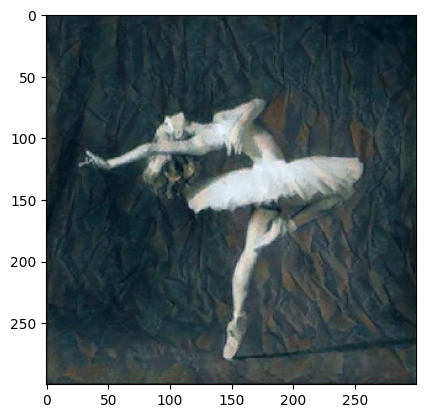

In [6]:
inp = generated_img.detach().cpu().squeeze()
inp = denormalize_img(inp)
plt.imshow(inp)

### Comprehensive Code Explanation

#### Code Block

```python
inp = generated_img.detach().cpu().squeeze()
inp = denormalize_img(inp)
plt.imshow(inp)
```

1. **Line-by-line Breakdown:**
   - `inp = generated_img.detach().cpu().squeeze()`: 将生成图像从计算图中分离出来，移动到CPU，并去掉批次维度。
   - `inp = denormalize_img(inp)`: 对图像进行反归一化处理。
   - `plt.imshow(inp)`: 使用Matplotlib显示图像。

2. **Purpose and Functionality:**
   - 该代码块用于将生成图像从GPU移动到CPU，进行反归一化处理，并显示图像。

3. **Technical Reasoning:**
   - `detach()` 方法用于将张量从计算图中分离出来，以防止梯度计算。
   - `cpu()` 方法用于将张量从GPU移动到CPU，以便使用CPU上的库（如Matplotlib）进行处理。
   - `squeeze()` 方法用于去掉批次维度，使图像形状适合显示。
   - `denormalize_img()` 函数用于将归一化图像转换回原始图像，以便进行可视化。
   - `plt.imshow()` 用于显示图像。

### Multilevel Function and Parameter Analysis

#### Function: `detach`

**A. Detailed Parameter Explanation:**
- 无参数。

**B. Function Context Analysis:**
- `detach()` 方法用于将张量从计算图中分离出来，以防止梯度计算。
- 选择该方法是为了在显示图像时避免不必要的梯度计算。
- 可替代实现：使用 `with torch.no_grad()` 上下文管理器。
- 性能和设计考虑：分离张量可以减少计算开销。

#### Function: `cpu`

**A. Detailed Parameter Explanation:**
- 无参数。

**B. Function Context Analysis:**
- `cpu()` 方法用于将张量从GPU移动到CPU，以便使用CPU上的库进行处理。
- 选择该方法是因为Matplotlib在CPU上运行。
- 可替代实现：如果图像已经在CPU上，则不需要调用该方法。
- 性能和设计考虑：移动张量到CPU会增加一些开销，但这是必要的以便进行显示。

#### Function: `squeeze`

**A. Detailed Parameter Explanation:**
- 无参数。

**B. Function Context Analysis:**
- `squeeze()` 方法用于去掉批次维度，使图像形状适合显示。
- 选择该方法是为了将形状为 `(1, C, H, W)` 的张量转换为 `(C, H, W)`。
- 可替代实现：使用 `view` 或 `reshape` 方法。
- 性能和设计考虑：去掉多余的维度可以简化后续处理。

#### Function: `denormalize_img`

**A. Detailed Parameter Explanation:**
- `inp`: 归一化图像，PyTorch张量，形状为（通道数，高度，宽度）。

**B. Function Context Analysis:**
- 选择该函数是为了将归一化图像转换回原始图像，以便进行可视化。
- 可替代实现：在图像显示时进行反归一化。
- 性能和设计考虑：使用NumPy进行高效数组操作。

#### Function: `plt.imshow`

**A. Detailed Parameter Explanation:**
- `inp`: 图像数据，NumPy数组，形状为（高度，宽度，通道数）。

**B. Function Context Analysis:**
- 选择该函数是为了显示图像。
- 可替代实现：使用其他图像显示库如OpenCV。
- 性能和设计考虑：Matplotlib是一个功能强大的绘图库，适合用于图像显示。

### Specialized Analysis Areas

#### Function Choice Insights

- 选择 `detach()` 是为了将张量从计算图中分离出来，以防止梯度计算。
- 选择 `cpu()` 是为了将张量从GPU移动到CPU，以便使用CPU上的库进行处理。
- 选择 `squeeze()` 是为了去掉批次维度，使图像形状适合显示。
- 选择 `denormalize_img()` 是为了将归一化图像转换回原始图像，以便进行可视化。
- 选择 `plt.imshow()` 是为了显示图像。

#### Activation Functions

- 本代码未涉及激活函数，但在深度学习模型中，激活函数的选择对模型性能有重要影响。

#### Data Processing Functions

- `detach()`、`cpu()`、`squeeze()` 和 `denormalize_img()` 函数涉及数据处理，前者用于分离张量和移动设备，后者用于反归一化处理。

### Code Review Dimensions

- **Syntax Correctness:** 代码语法正确，无明显错误。
- **Performance Optimization Opportunities:** 可以考虑在数据加载器中进行图像变换以提高效率。
- **Coding Best Practices Adherence:** 代码结构清晰，函数命名合理。
- **Algorithmic Improvement Potential:** 可以进一步优化图像处理步骤以提高性能。

### Parameter-Specific Guidance

- **Common Configuration Mistakes:** 确保图像路径有效，变换函数正确定义。
- **Parameter Tuning Strategies:** 根据具体任务调整图像大小和变换函数。
- **Input Validation Recommendations:** 添加输入验证以确保图像路径和变换函数有效。

### Constructive Technical Feedback

- **Improvement Suggestions:**
  - 在 `denormalize_img` 函数中添加对输入类型的检查。
  
- **Rationale for Recommended Modifications:**
  - 输入验证可以提高代码的鲁棒性，防止无效输入导致错误。
  
- **Concrete Implementation Examples:**

```python
def denormalize_img(inp):
    if not isinstance(inp, np.ndarray):
        raise TypeError("Input must be a NumPy array.")
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

inp = generated_img.detach().cpu().squeeze()
inp = denormalize_img(inp)
plt.imshow(inp)
```

通过这些改进，可以提高代码的鲁棒性和可维护性。